# Imports

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Random Forest

In [3]:
def train_randomForest(x_train, y_train, x_test, y_test, n_ofTrees):
    clf = RandomForestClassifier(n_estimators=n_ofTrees, max_depth=6, random_state=42,min_samples_split=3)

    # Train the model
    clf.fit(x_train, y_train)

    # Make predictions on the testing data
    y_pred = clf.predict(x_test)

    # Evaluate the performance of the model
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    return clf

# Cross Validation

In [4]:
def evaluate_cv_model(model, X_train, y_train, kFolds):
    a_score = cross_val_score(model, X_train, y_train, cv=kFolds, scoring='accuracy')
    accuracy = a_score.mean()

    return accuracy

# Confusion Matrix & Classification Report

In [5]:
def plot_confusionMatrix (clf, y_test, X_test, st):
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Greys")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #add title
    plt.title("Confusion matrix for RF model for " + st + ' dataset')
    report = classification_report(y_test, y_pred)
    plt.show()

    return report


# ECG Data

In [6]:
# read csv
df_ECG = pd.read_csv('preprocessed_ECG.csv')
X_ECG = df_ECG.drop(['target','Unnamed: 0', 'video_name','video'] , axis=1)

y_ECG = df_ECG.target

Accuracy: 0.8795180722891566
Accuracy:  0.9830788084464556


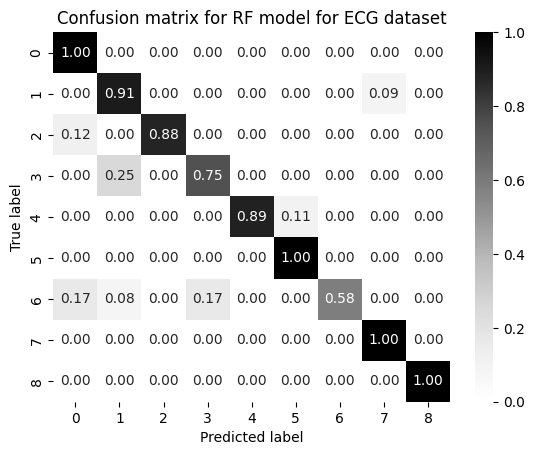

In [7]:

X_train_ECG, X_test_ECG, y_train_ECG, y_test_ECG = train_test_split(X_ECG, y_ECG, test_size=0.2, random_state=42)

clf_ECG = train_randomForest(X_train_ECG, y_train_ECG, X_test_ECG, y_test_ECG, 100)

accuracy = evaluate_cv_model(clf_ECG, X_ECG, y_ECG, 8)
print("Accuracy: ", accuracy)

report_ECG = plot_confusionMatrix (clf_ECG, y_test_ECG, X_test_ECG, 'ECG')





In [8]:
print(report_ECG)

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.77      0.91      0.83        11
           2       1.00      0.88      0.93         8
           3       0.75      0.75      0.75         8
           4       1.00      0.89      0.94         9
           5       0.92      1.00      0.96        11
           6       1.00      0.58      0.74        12
           7       0.92      1.00      0.96        11
           8       1.00      1.00      1.00         8

    accuracy                           0.88        83
   macro avg       0.89      0.89      0.88        83
weighted avg       0.90      0.88      0.88        83



# EEG Data

In [9]:
df_EEG = pd.read_csv('preprocessed_EEG.csv')
X_EEG = df_EEG.drop(['target','Unnamed: 0', 'video_name','video'] , axis=1)
y_EEG = df_EEG.target

Accuracy: 0.1927710843373494
Accuracy:  0.17859162895927605


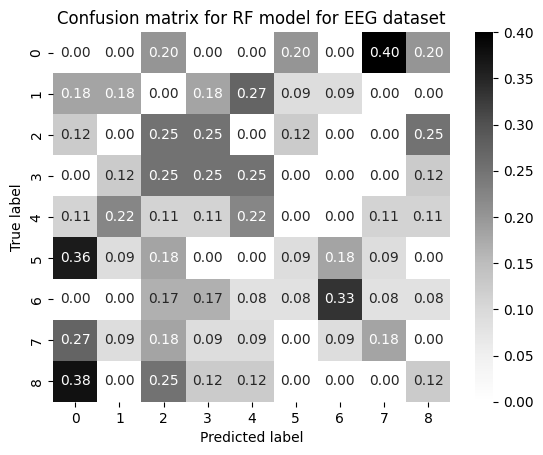

In [10]:

X_train_EEG, X_test_EEG, y_train_EEG, y_test_EEG = train_test_split(X_EEG, y_EEG, test_size=0.2, random_state=42)

clf_EEG = train_randomForest(X_train_EEG, y_train_EEG, X_test_EEG, y_test_EEG, 100)

accuracy_EEG = evaluate_cv_model(clf_EEG, X_EEG, y_EEG, 8)
print("Accuracy: ", accuracy_EEG)

report_EEG = plot_confusionMatrix (clf_EEG, y_test_EEG, X_test_EEG, 'EEG')


In [11]:
print(report_EEG)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.29      0.18      0.22        11
           2       0.14      0.25      0.18         8
           3       0.18      0.25      0.21         8
           4       0.20      0.22      0.21         9
           5       0.20      0.09      0.13        11
           6       0.50      0.33      0.40        12
           7       0.29      0.18      0.22        11
           8       0.14      0.12      0.13         8

    accuracy                           0.19        83
   macro avg       0.22      0.18      0.19        83
weighted avg       0.24      0.19      0.21        83



# EEG + ECG Data

In [12]:
df_EEG_ECG = pd.read_csv('Final_Data.csv')
X_EEG_ECG = df_EEG_ECG.drop(['target','Unnamed: 0', 'video_name','video'] , axis=1)
y_EEG_ECG = df_EEG_ECG.target

Accuracy: 0.8313253012048193
Accuracy:  0.9444287330316742


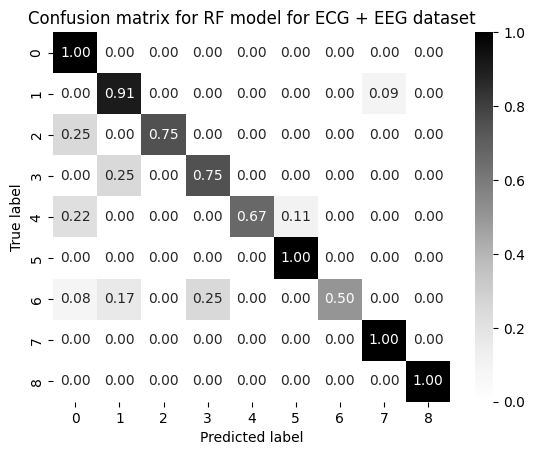

In [13]:

X_train_EEG_ECG, X_test_EEG_ECG, y_train_EEG_ECG, y_test_EEG_ECG = train_test_split(X_EEG_ECG, y_EEG_ECG, test_size=0.2, random_state=42)

clf_EEG_ECG = train_randomForest(X_train_EEG_ECG, y_train_EEG_ECG, X_test_EEG_ECG, y_test_EEG_ECG, 100)

accuracy = evaluate_cv_model(clf_EEG_ECG, X_EEG_ECG, y_EEG_ECG, 8)
print("Accuracy: ", accuracy)

report_EEG_ECG = plot_confusionMatrix (clf_EEG_ECG, y_test_EEG_ECG, X_test_EEG_ECG, 'ECG + EEG')



In [14]:
print(report_EEG_ECG)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       0.71      0.91      0.80        11
           2       1.00      0.75      0.86         8
           3       0.67      0.75      0.71         8
           4       1.00      0.67      0.80         9
           5       0.92      1.00      0.96        11
           6       1.00      0.50      0.67        12
           7       0.92      1.00      0.96        11
           8       1.00      1.00      1.00         8

    accuracy                           0.83        83
   macro avg       0.86      0.84      0.82        83
weighted avg       0.88      0.83      0.83        83



# Graph Accuracies

In [19]:

def graph_accuracy(values_w, values_wo, ST):
    classes = ['KNN', 'Linear SVM', 'RBF SVM', 'Sigmoid SVM', 'Poly SVM', 'Log Regression', 'Random Forest']
    fig = plt.figure()
    #change the fig size
    fig.set_size_inches(20, 20)
    ax = fig.add_subplot(111, projection='3d')
    ax.bar(classes, values_w, color='#004fa0', label='With Outliers', zs=values_wo, zdir='y', edgecolor ='black')
    ax.bar(classes, values_wo, color='#aba1ff', label='With Outliers', zs=values_w, zdir='y', edgecolor ='black')
    # ax.set_xlabel('Models')
    plt.xticks(rotation=45)
    ax.set_ylabel('Accuracy without cross validation')
    ax.set_zlabel('Accuracy with cross validation')
    #add borders to the a single bar on the graph

    #add title
    plt.title('Accuracy of Models of '+ ST + ' Dataset')
    plt.show()

# Graph EEG Accuracies

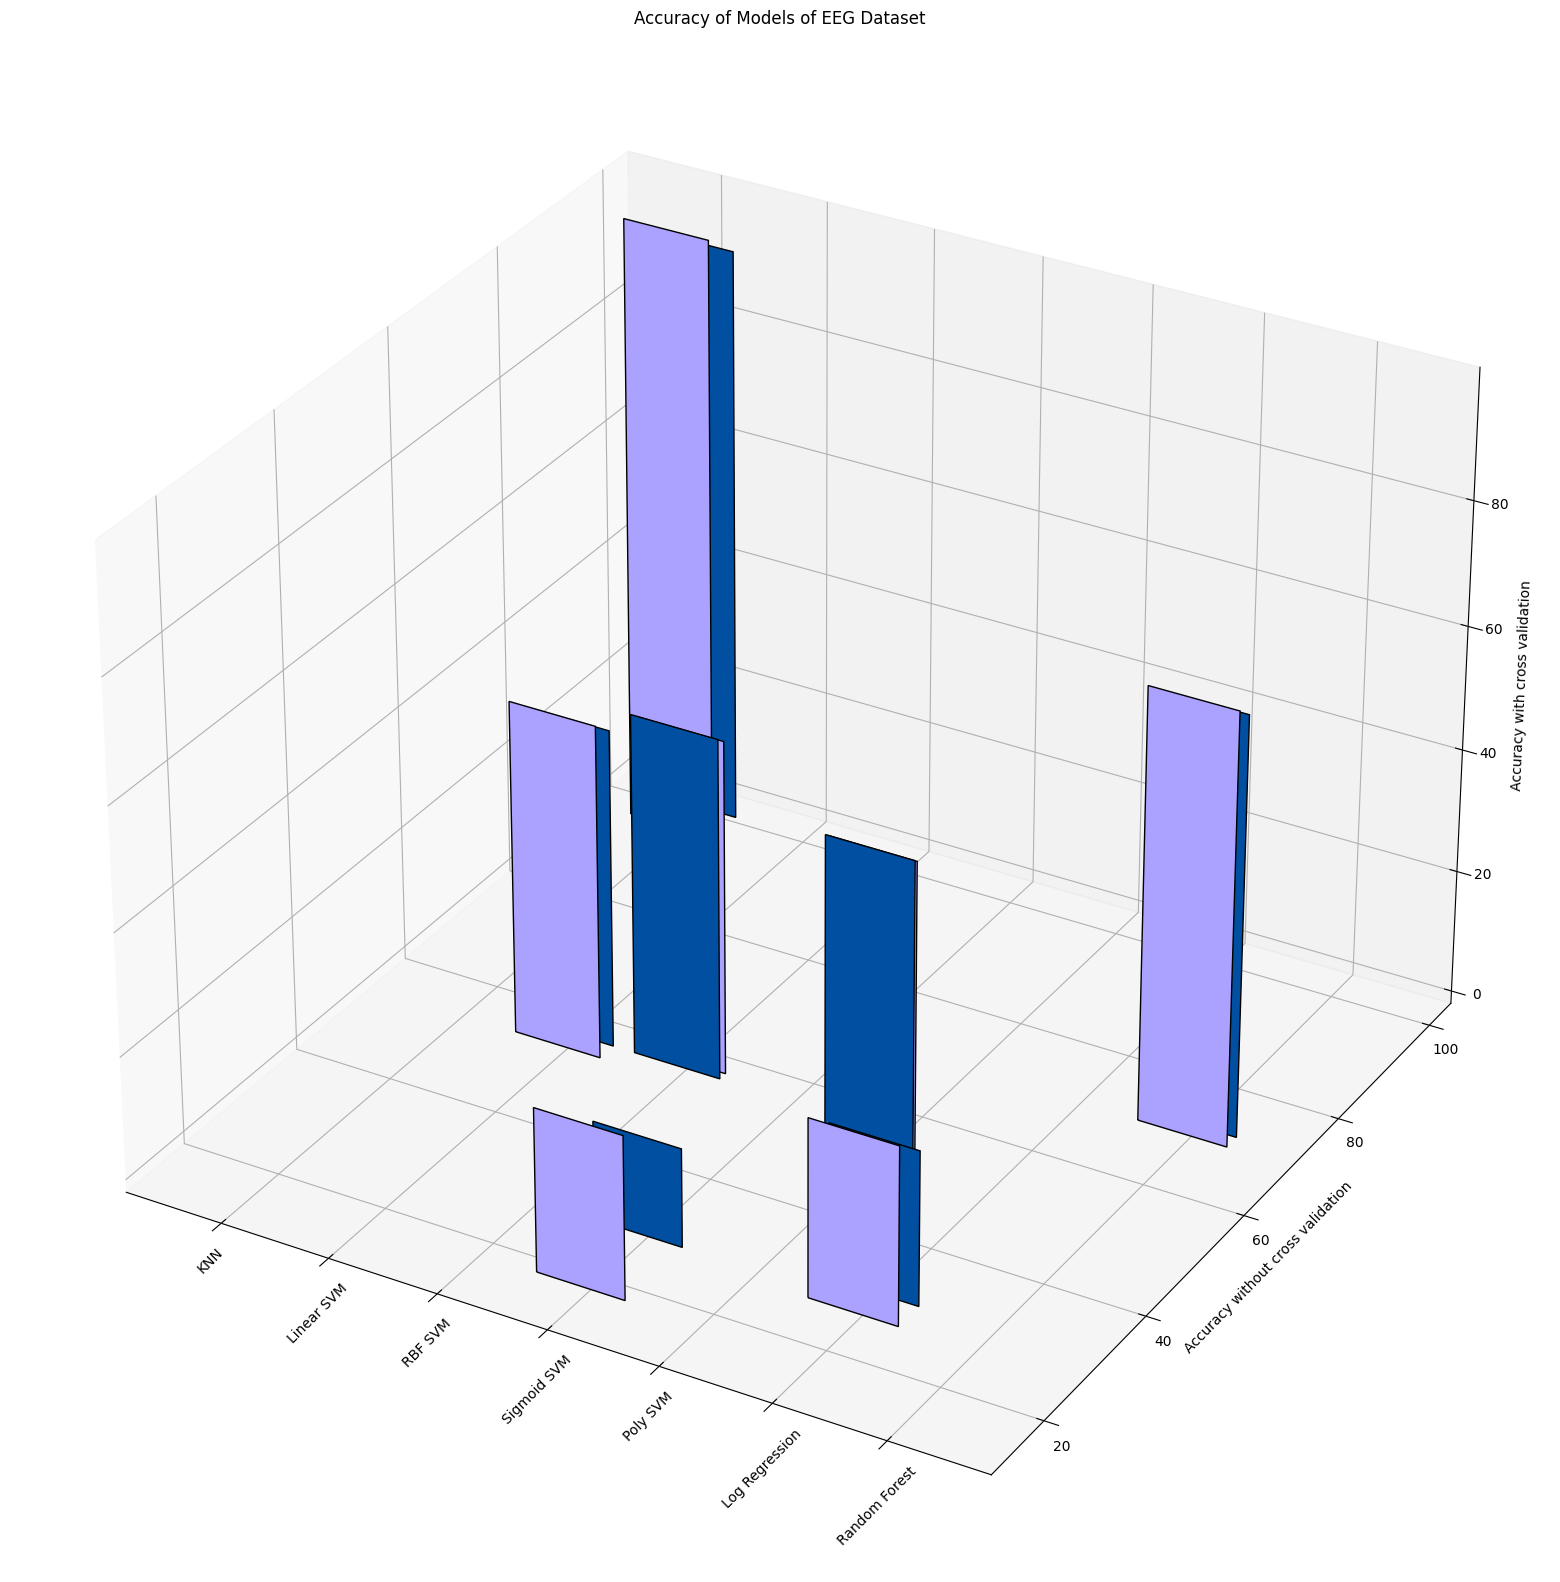

In [20]:
values_w_EEG = [94, 51.68, 55.3, 16, 49.8, 25, 68]
values_wo_EEG = [98.8, 54.2, 54.2, 26.5, 49.4, 28.9, 70]

graph_accuracy(values_w_EEG, values_wo_EEG, 'EEG')

# Graph ECG Accuracies

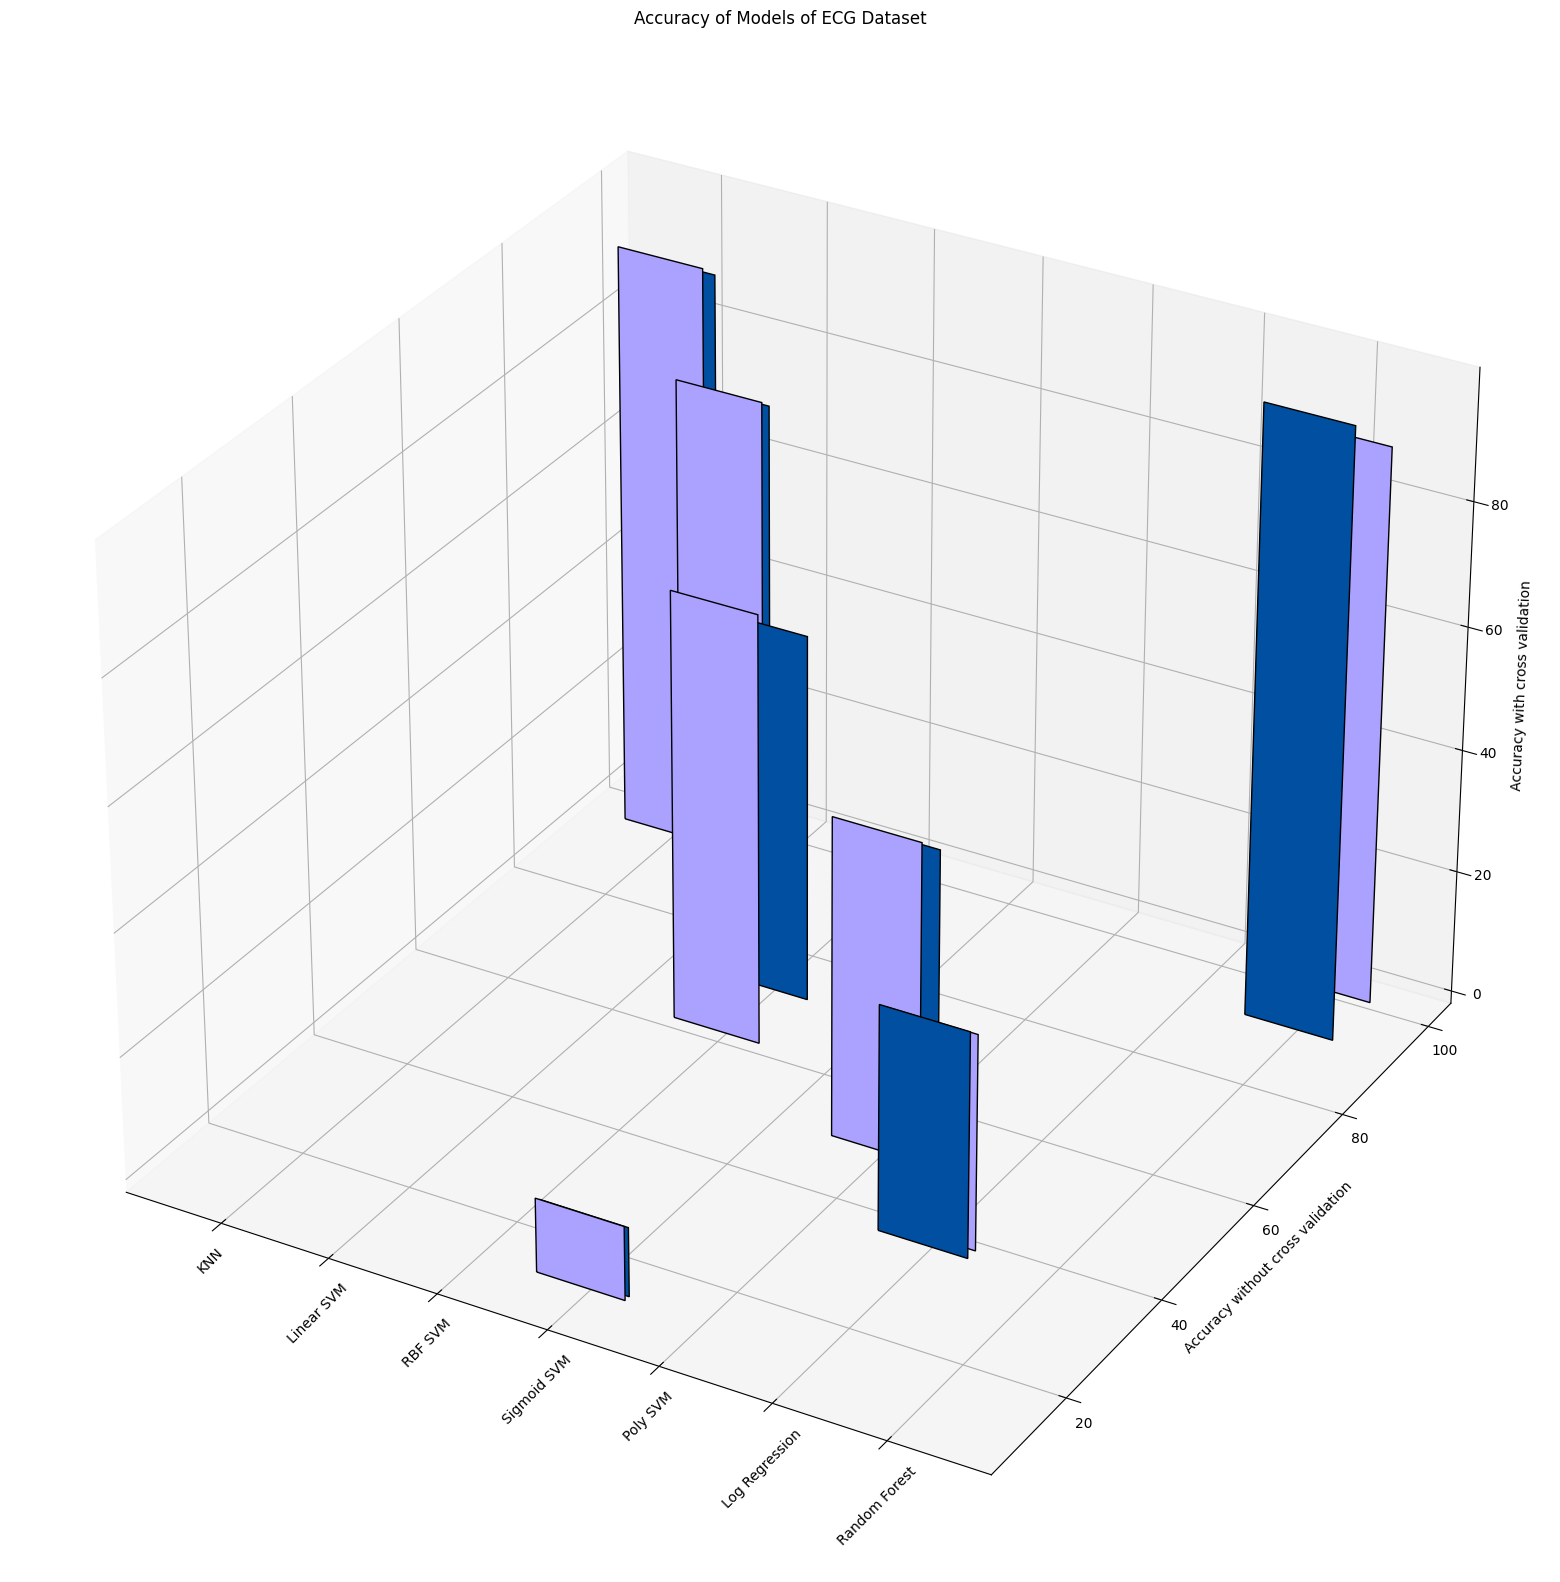

In [17]:
values_w_ECG = [92.7, 82.8, 59.8, 11.2, 48, 36.5, 99]
values_wo_ECG = [95.2, 84.3, 69.88, 12, 51.8, 34.9, 90.3]
graph_accuracy(values_w_ECG, values_wo_ECG, 'ECG')

# Graph EEG + ECG Accuracies

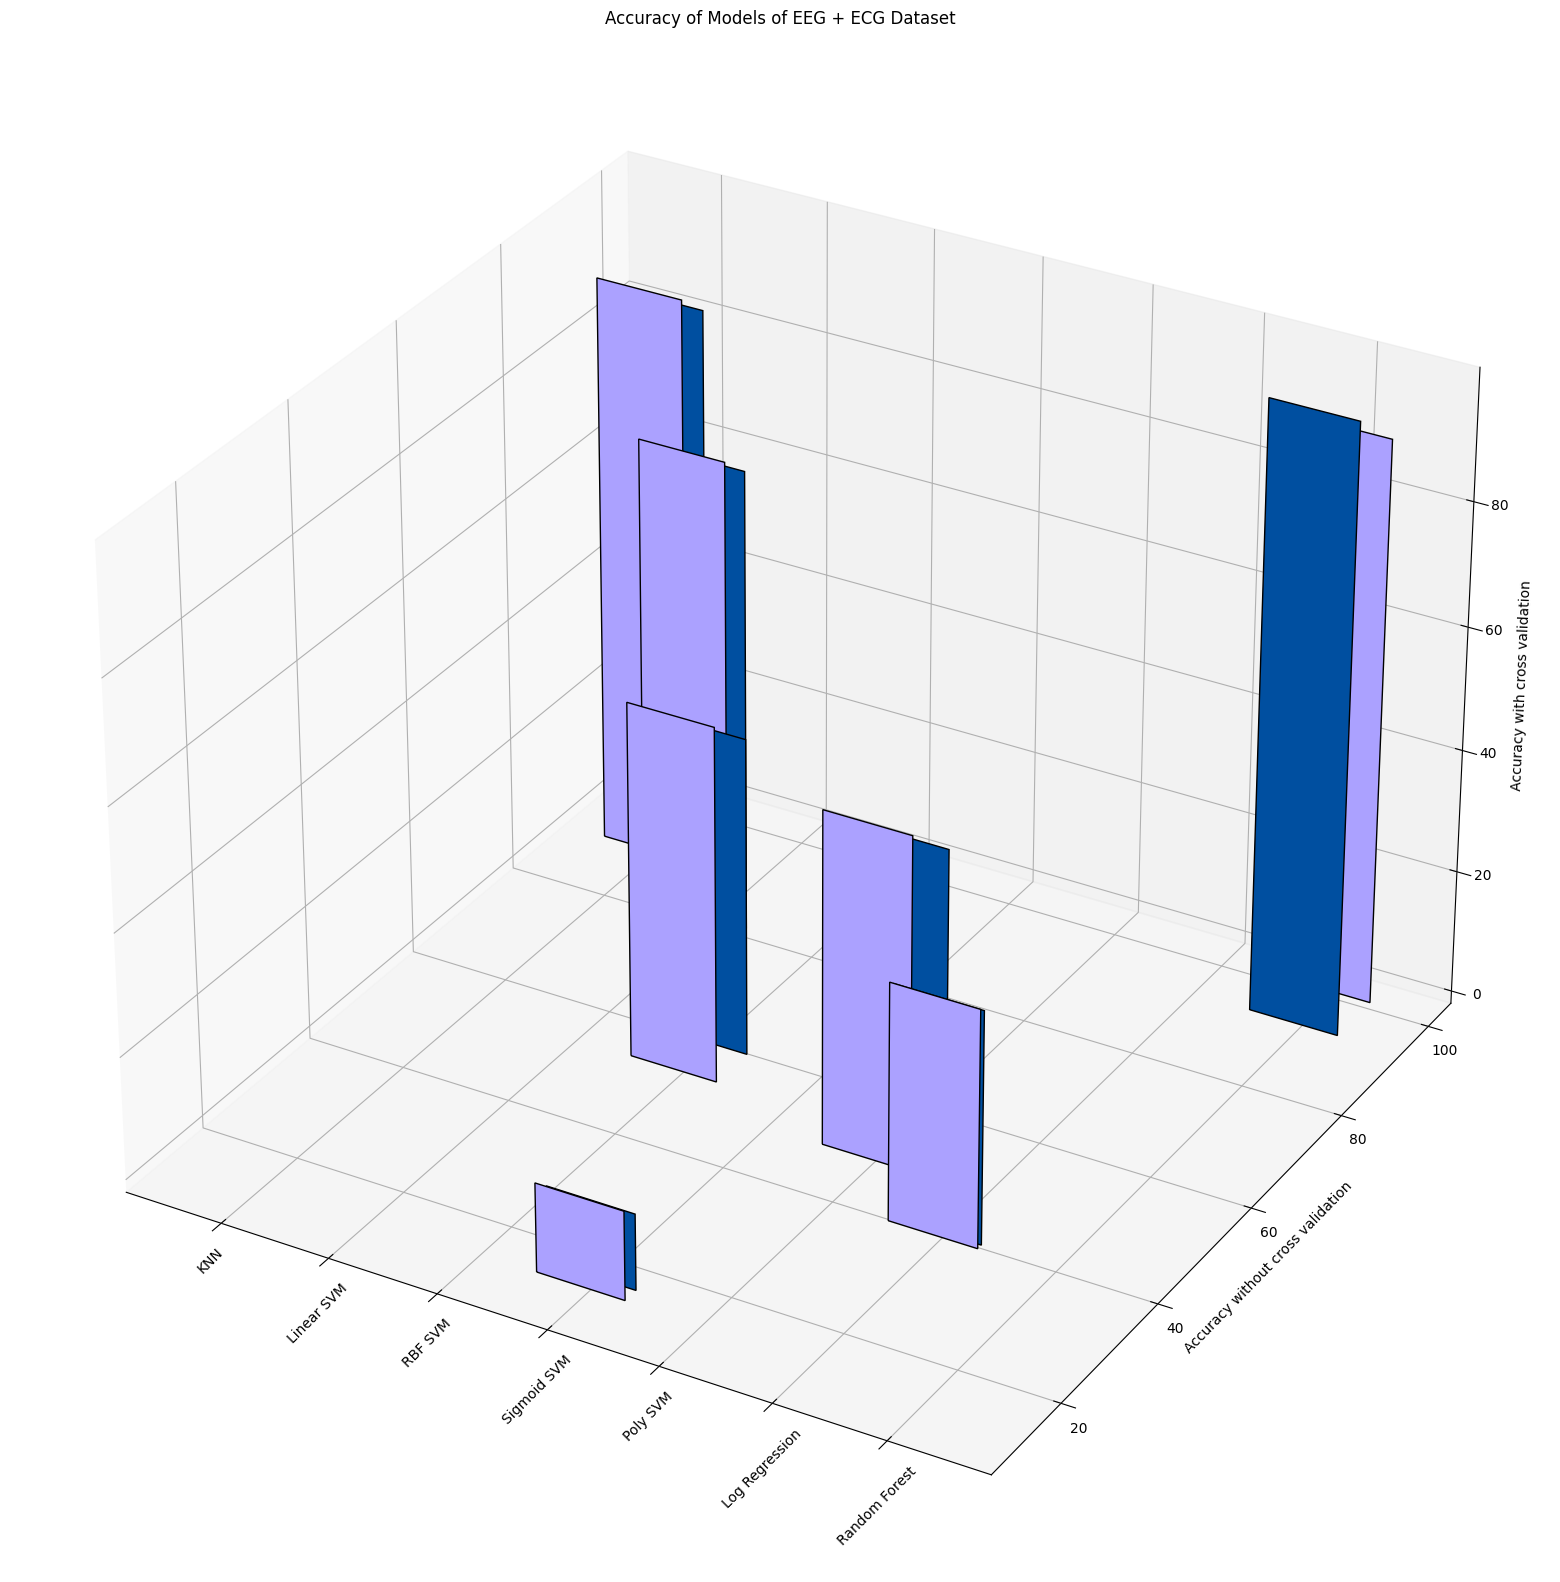

In [18]:
values_w_EEG_ECG = [88.5, 75.5, 51.65, 12.38, 46.8, 37.8, 99]
values_wo_EEG_ECG = [92.77, 79.5, 57.83, 14.46, 54.22, 38.55, 91.5]
graph_accuracy(values_w_EEG_ECG, values_wo_EEG_ECG, 'EEG + ECG')